<a href="https://colab.research.google.com/github/flcam/Projeto-Python---Dataframes/blob/main/An%C3%A1lise_Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

# Versões das bibliotecas

In [2]:
print(f'Versão do pandas:{pd.__version__}')
print(f'Versão do seaborn:{sns.__version__}')
print(f'Versão do numpy:{np.__version__}')
print(f'Versão do sklearn:{sklearn.__version__}')

Versão do pandas:2.2.2
Versão do seaborn:0.13.2
Versão do numpy:1.26.4
Versão do sklearn:1.6.1


# Leitura e armazenamento dos dados do arquivo CSV

In [3]:
df = pd.read_csv('/content/alzheimers_prediction_dataset.csv')
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


# Verifica se há algum valor nulo em qualquer coluna do DataFrame

In [ ]:
df.isnull().any().any()

False

# Retorna as dimensões de um DataFrame, ou seja, a quantidade de linhas e colunas que ele possui

In [ ]:
df.shape

(74283, 25)

# Exclusão de colunas contendo dados não relevantes para a referida análise

In [ ]:
exclui_dados = df.drop(columns=['Education Level', 'Air Pollution Exposure', 'Social Engagement Level', 'Sleep Quality', 'Marital Status', 'Diabetes','Employment Status', 'Cognitive Test Score', 'Income Level'])
df = exclui_dados
df.head()

,Country,Age,Gender,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Depression Level,Dietary Habits,Genetic Risk Factor (APOE-ε4 allele),Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,33.0,Medium,Never,Occasionally,No,Normal,No,Low,Healthy,No,High,Urban,No
1,Argentina,72,Male,29.9,Medium,Former,Never,No,Normal,No,Low,Healthy,No,High,Urban,No
2,South Africa,86,Female,22.9,High,Current,Occasionally,Yes,Normal,No,High,Average,No,High,Rural,No
3,China,53,Male,31.2,Low,Never,Regularly,No,Normal,No,Medium,Healthy,No,Low,Rural,No
4,Sweden,58,Female,30.0,High,Former,Never,No,Normal,No,High,Unhealthy,No,High,Rural,No


# Renomeando os nomes das colunas

In [ ]:
df.rename(columns={"Country": "Pais", "Age": "Idade", "Education Level": "Nivel Escolaridade", "BMI": "IMC","Physical Activity Level": "Nivel Atividade Fisica", "Family History of Alzheimer’s": "Historico Familiar de Alzheimer", "Marital Status": "Estado Civil", "Gender": "Gênero", "Genetic Risk Factor (APOE-ε4 allele)": "Risco Genetico", "Alzheimer’s Diagnosis": "Diagnosticos de Alzheimer"}, inplace=True)
df.head()

,Pais,Idade,Gênero,IMC,Nivel Atividade Fisica,Smoking Status,Alcohol Consumption,Hypertension,Cholesterol Level,Historico Familiar de Alzheimer,Depression Level,Dietary Habits,Risco Genetico,Stress Levels,Urban vs Rural Living,Diagnosticos de Alzheimer
0,Spain,90,Male,33.0,Medium,Never,Occasionally,No,Normal,No,Low,Healthy,No,High,Urban,No
1,Argentina,72,Male,29.9,Medium,Former,Never,No,Normal,No,Low,Healthy,No,High,Urban,No
2,South Africa,86,Female,22.9,High,Current,Occasionally,Yes,Normal,No,High,Average,No,High,Rural,No
3,China,53,Male,31.2,Low,Never,Regularly,No,Normal,No,Medium,Healthy,No,Low,Rural,No
4,Sweden,58,Female,30.0,High,Former,Never,No,Normal,No,High,Unhealthy,No,High,Rural,No


# Resumo estatístico descritivo do DataFrame com "describe"

In [ ]:
df['Diagnosticos Alzheimer Binario'] = df['Diagnosticos de Alzheimer'].map({'Yes': 1, 'No': 0})
df.head()

,Pais,Idade,Gênero,IMC,Nivel Atividade Fisica,Smoking Status,Alcohol Consumption,Hypertension,Cholesterol Level,Historico Familiar de Alzheimer,Depression Level,Dietary Habits,Risco Genetico,Stress Levels,Urban vs Rural Living,Diagnosticos de Alzheimer,Diagnosticos Alzheimer Binario
0,Spain,90,Male,33.0,Medium,Never,Occasionally,No,Normal,No,Low,Healthy,No,High,Urban,No,0
1,Argentina,72,Male,29.9,Medium,Former,Never,No,Normal,No,Low,Healthy,No,High,Urban,No,0
2,South Africa,86,Female,22.9,High,Current,Occasionally,Yes,Normal,No,High,Average,No,High,Rural,No,0
3,China,53,Male,31.2,Low,Never,Regularly,No,Normal,No,Medium,Healthy,No,Low,Rural,No,0
4,Sweden,58,Female,30.0,High,Former,Never,No,Normal,No,High,Unhealthy,No,High,Rural,No,0


In [ ]:
#df = df.describe().map(lambda x: '{:.0f}'.format(x))
#print(df)

       Idade    IMC Diagnosticos Alzheimer Binario
count  74283  74283                          74283
mean      72     27                              0
std       13      5                              0
min       50     18                              0
25%       61     23                              0
50%       72     27                              0
75%       83     31                              1
max       94     35                              1


In [ ]:
diagnosticos_paises = df.groupby('Pais')['Diagnosticos Alzheimer Binario'].sum().reset_index()
diagnosticos_paises.head()

,Pais,Diagnosticos Alzheimer Binario
0,Argentina,1500
1,Australia,1525
2,Brazil,1865
3,Canada,1267
4,China,1388


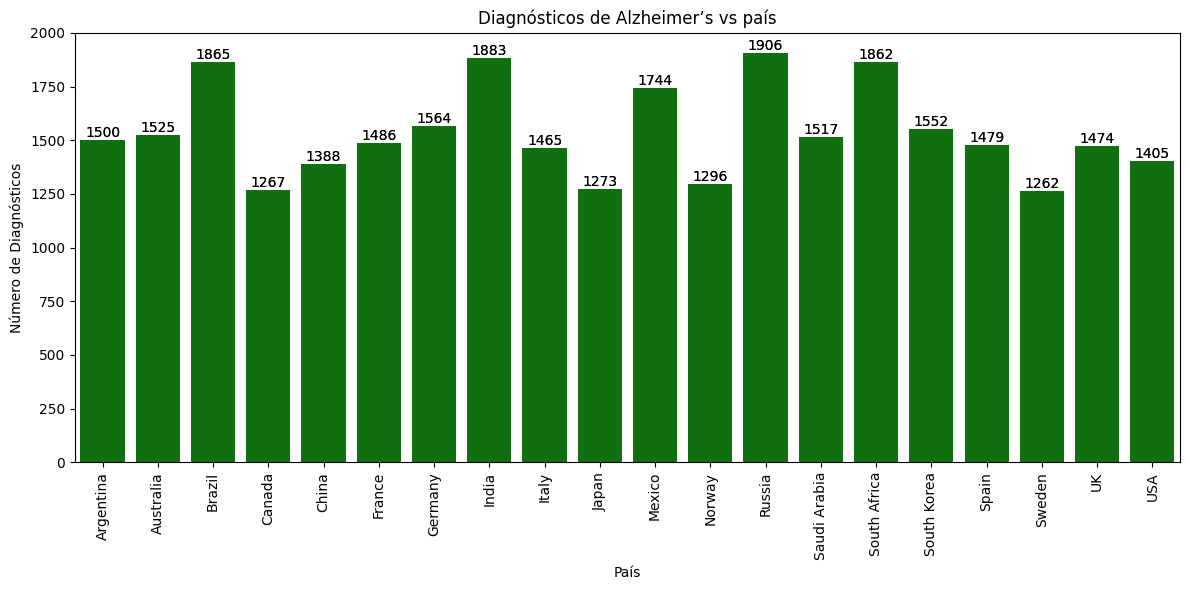

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Pais', y='Diagnosticos Alzheimer Binario', data=diagnosticos_paises)
plt.title('Diagnósticos de Alzheimer’s vs país')
plt.xlabel('País')
plt.ylabel('Número de Diagnósticos')
plt.xticks(rotation='vertical')  # Rotaciona os rótulos do eixo x em 90 graus

# Define os limites do eixo y de 0 a 2000
plt.ylim(0, 2000)

plt.tight_layout()

# Imprime os dados totais no topo de cada barra.
ax = sns.barplot(x='Pais', y='Diagnosticos Alzheimer Binario', data=diagnosticos_paises, color='green')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.0f}'.format(p.get_height()),
            ha='center', va='bottom')

plt.show()

In [ ]:
total = df['Diagnosticos de Alzheimer’s'].sum()
total

30713

In [ ]:
media_idade = round(dados["Age"].mean())
media_idade

72

In [ ]:
percentual_casos = diagnosticos_paises
percentual_casos['percentual'] = (diagnosticos_paises['Diagnosticos de Alzheimer’s'] / total) * 100
percentual_casos.head()

,Country,Diagnosticos de Alzheimer’s,percentual
0,Argentina,1500,4.883925
1,Australia,1525,4.965324
2,Brazil,1865,6.072347
3,Canada,1267,4.125289
4,China,1388,4.519259


In [ ]:
lista_paises = percentual_casos['percentual'].tolist()
print(lista_paises)

[4.883925373620291, 4.965324129847296, 6.072347214534561, 4.1252889655846054, 4.51925894572331, 4.8383420701331685, 5.092306189561423, 6.130954319018005, 4.769967114902484, 4.144824667079087, 5.6783772343958585, 4.219711522807931, 6.205841174746849, 4.939276527854655, 6.062579363787321, 5.053234786572461, 4.8155504183896065, 4.109009214339205, 4.799270667144206, 4.574610099957672]


In [ ]:
lista_paises = percentual_casos['Country'].tolist()
print(lista_paises)

['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Mexico', 'Norway', 'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'UK', 'USA']


<ipython-input-49-63396a9294c6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Country', y='percentual', data=percentual_casos, palette=palette)


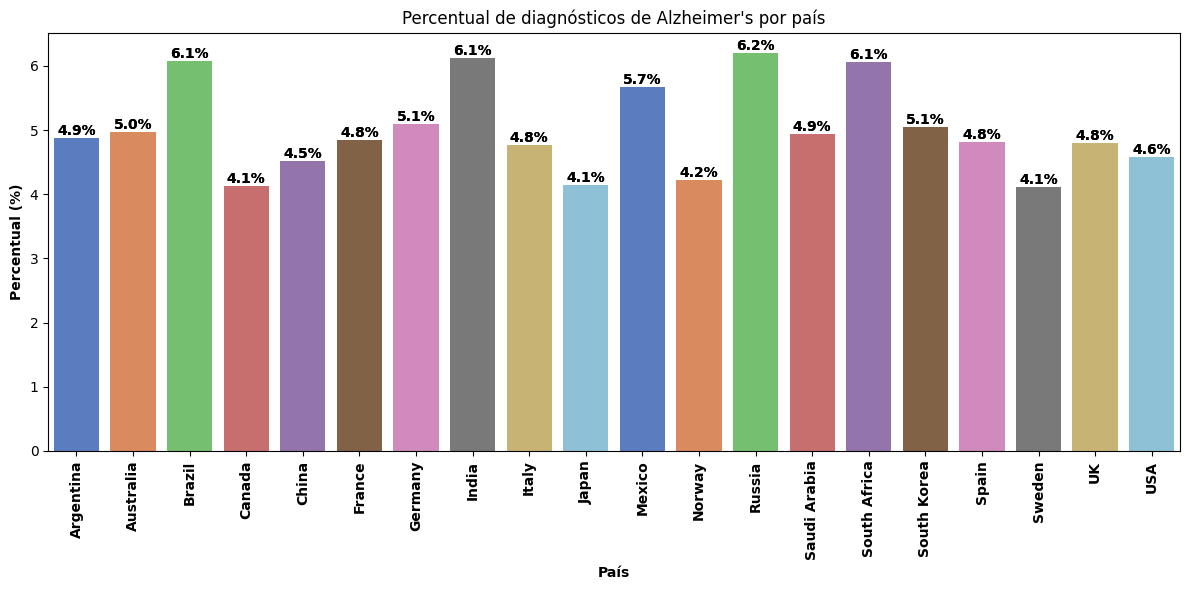

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='percentual', data=percentual_casos)
plt.title('Percentual de diagnósticos de Alzheimer\'s por país')
plt.xlabel('País', fontweight='bold')
plt.ylabel('Percentual (%)', fontweight='bold')
plt.xticks(rotation='vertical', fontweight='bold')
plt.tight_layout()

# Cria o gráfico com a paleta de cores
palette = sns.color_palette("muted", len(percentual_casos))

#Para adicionar os valores dos percentuais no topo de cada barra, utilize o seguinte código dentro do bloco do gráfico:
ax = sns.barplot(x='Country', y='percentual', data=percentual_casos, palette=palette)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.1f}%'.format(p.get_height()),
            ha='center', va='bottom', fontweight='bold') # Modificação aqui


plt.show()

In [ ]:
at_fisica = df['Physical Activity Level']

In [ ]:
opcoes_unicas = at_fisica.unique()
opcoes_unicas

array(['Medium', 'High', 'Low'], dtype=object)

In [ ]:
df['Physical Activity Level'] = df['Physical Activity Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df.head()

,Country,Age,Gênero,Education Level,IMC,Physical Activity Level,Smoking Status,Alcohol Consumption,Hypertension,Cholesterol Level,...,Depression Level,Dietary Habits,Employment Status,Estado Civil,Risco Genetico,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis,Diagnosticos de Alzheimer’s
0,Spain,90,Male,1,33.0,1,Never,Occasionally,No,Normal,...,Low,Healthy,Retired,Single,No,Medium,High,Urban,No,0
1,Argentina,72,Male,7,29.9,1,Former,Never,No,Normal,...,Low,Healthy,Unemployed,Widowed,No,Low,High,Urban,No,0
2,South Africa,86,Female,19,22.9,2,Current,Occasionally,Yes,Normal,...,High,Average,Employed,Single,No,Medium,High,Rural,No,0
3,China,53,Male,17,31.2,0,Never,Regularly,No,Normal,...,Medium,Healthy,Retired,Single,No,Medium,Low,Rural,No,0
4,Sweden,58,Female,3,30.0,2,Former,Never,No,Normal,...,High,Unhealthy,Employed,Married,No,Medium,High,Rural,No,0


In [ ]:
# Agrupa os dados por tipo de atividade física e diagnóstico de Alzheimer's
agrupado = df.groupby(['Physical Activity Level', 'Alzheimer’s Diagnosis'])['Diagnosticos de Alzheimer’s'].sum().reset_index()

# Renomeia as colunas para melhor clareza
agrupado = agrupado.rename(columns={'Physical Activity Level': 'Nível de Atividade Física', 'Alzheimer’s Diagnosis': 'Diagnóstico de Alzheimer’s', 'Diagnosticos de Alzheimer’s': 'Total'})

# Exibe o resultado
print(agrupado)

   Nível de Atividade Física Diagnóstico de Alzheimer’s  Total
0                          0                         No      0
1                          0                        Yes  10218
2                          1                         No      0
3                          1                        Yes  10167
4                          2                         No      0
5                          2                        Yes  10328


In [ ]:
# Agrupa os dados pela coluna 'coluna1' e conta os valores da coluna 'coluna2' em cada grupo
contagem = df.groupby('Alzheimer’s Diagnosis')['IMC'].value_counts().reset_index(name='contagem')

# Exibe o resultado
contagem.head(400)

,Alzheimer’s Diagnosis,IMC,contagem
0,No,26.3,319
1,No,19.6,317
2,No,31.5,310
3,No,24.7,306
4,No,34.8,306
...,...,...,...
327,Yes,28.3,160
328,Yes,34.0,154
329,Yes,23.0,153
330,Yes,35.0,100


In [ ]:
diagnosticos_yes_imc = df.loc[df['Alzheimer’s Diagnosis'] == 'Yes', ['Alzheimer’s Diagnosis', 'IMC']].value_counts()
diagnosticos_yes_imc = diagnosticos_yes_imc.sort_index(level='IMC', ascending=False)
diagnosticos_yes_imc

Alzheimer’s Diagnosis  IMC 
Yes                    35.0    100
                       34.9    191
                       34.8    189
                       34.7    221
                       34.6    203
                              ... 
                       18.9    173
                       18.8    176
                       18.7    189
                       18.6    191
                       18.5     91
Name: count, Length: 166, dtype: int64

In [ ]:
# Agrupa os dados pela coluna 'coluna1' e conta os valores da coluna 'coluna2' em cada grupo
contagem_rg = df.groupby('Alzheimer’s Diagnosis')['Risco Genetico'].value_counts().reset_index(name='contagem')

# Exibe o resultado
contagem_rg.head()

,Alzheimer’s Diagnosis,Risco Genetico,contagem
0,No,No,37771
1,No,Yes,5799
2,Yes,No,21790
3,Yes,Yes,8923


In [ ]:
diagnosticos_rg = df.loc[df['Alzheimer’s Diagnosis'] == 'Yes', ['Alzheimer’s Diagnosis', 'Risco Genetico']].value_counts().reset_index(name='contagem')
# Set 'Alzheimer’s Diagnosis' and 'Risco Genetico' as index
diagnosticos_rg = diagnosticos_rg.set_index(['Alzheimer’s Diagnosis', 'Risco Genetico'])
# Now you can sort by index level
diagnosticos_rg = diagnosticos_rg.sort_index(level='Risco Genetico', ascending=False)
diagnosticos_rg.head()

contagem
Alzheimer’s Diagnosis Risco Genetico          
Yes                   Yes                 8923
                      No                 21790

In [ ]:
percentual_rgenetico = diagnosticos_rg
percentual_rgenetico['percentual'] = (diagnosticos_rg['contagem'] / total) * 100
percentual_rgenetico.head()

contagem  percentual
Alzheimer’s Diagnosis Risco Genetico                      
Yes                   Yes                 8923   29.052844
                      No                 21790   70.947156

<ipython-input-27-8d2c3b9cf861>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Risco Genetico', y='percentual', data=percentual_rgenetico, palette=colors, width=0.3)


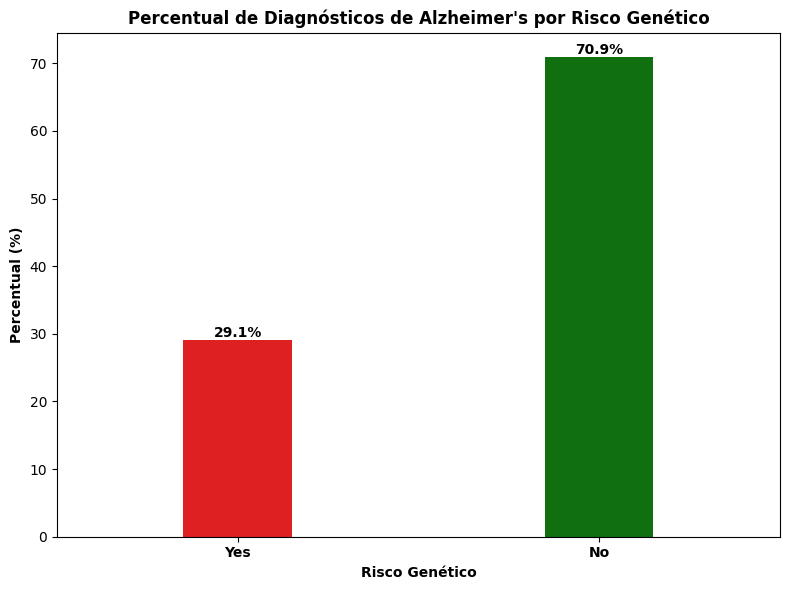

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'percentual_rgenetico' is your DataFrame
# Reset the index to a single level
percentual_rgenetico = percentual_rgenetico.reset_index()

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
# Defina a paleta de cores
colors = ['red', 'green']  # Uma cor para cada barra
# Use the column corresponding to the previous MultiIndex level
sns.barplot(x='Risco Genetico', y='percentual', data=percentual_rgenetico, palette=colors, width=0.3)
plt.title('Percentual de Diagnósticos de Alzheimer\'s por Risco Genético', fontweight='bold')
plt.xlabel('Risco Genético', fontweight='bold')  # Make x-axis label bold
plt.ylabel('Percentual (%)', fontweight='bold')  # Make y-axis label bold
plt.xticks(rotation=0, fontweight='bold')  # Make x-axis ticks bold and horizontal
plt.tight_layout()

# Add percentage labels on top of bars
ax = plt.gca()  # Get current axes
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.1f}%'.format(p.get_height()),
            ha='center', va='bottom', fontweight='bold')

plt.show()

In [ ]:
living = df.loc[df['Alzheimer’s Diagnosis'] == 'Yes', ['Alzheimer’s Diagnosis', 'Urban vs Rural Living']].value_counts().reset_index(name='contagem')
# Set 'Alzheimer’s Diagnosis' and 'Risco Genetico' as index
living = living.set_index(['Alzheimer’s Diagnosis', 'Urban vs Rural Living'])
# Now you can sort by index level
living = living.sort_index(level='Urban vs Rural Living', ascending=False)
living.head()

contagem
Alzheimer’s Diagnosis Urban vs Rural Living          
Yes                   Urban                     15256
                      Rural                     15457

In [ ]:
p_arterial = df.loc[df['Alzheimer’s Diagnosis'] == 'Yes', ['Alzheimer’s Diagnosis', 'Family History of Alzheimer’s']].value_counts().reset_index(name='contagem')
# Set 'Alzheimer’s Diagnosis' and 'Risco Genetico' as index
p_arterial = p_arterial.set_index(['Alzheimer’s Diagnosis', 'Family History of Alzheimer’s'])
# Now you can sort by index level
p_arterial = p_arterial.sort_index(level='Family History of Alzheimer’s', ascending=False)
p_arterial.head()

contagem
Alzheimer’s Diagnosis Family History of Alzheimer’s          
Yes                   Yes                               11573
                      No                                19140